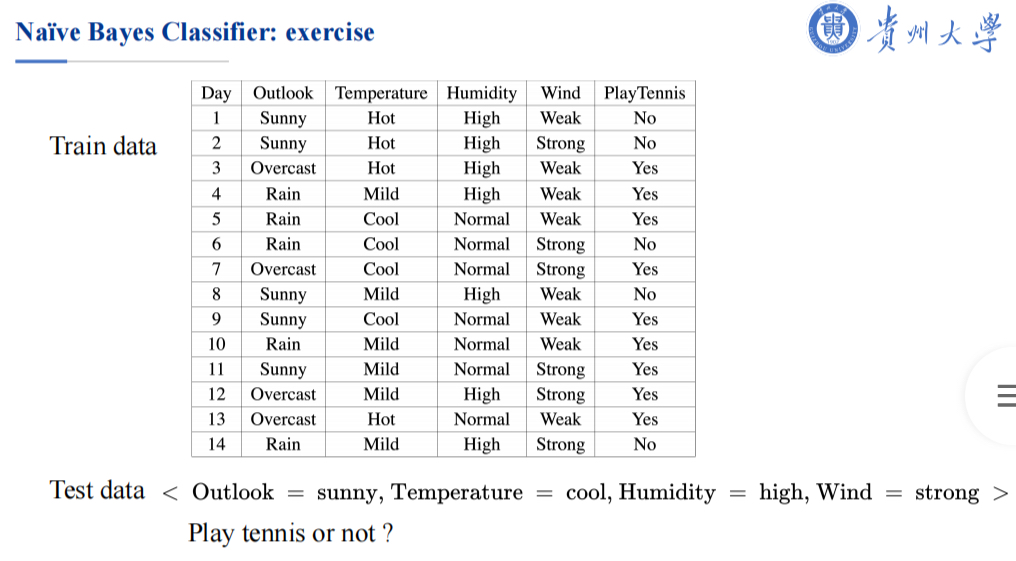

### Prior probability:
##### P(PlayTennis="Yes")=9/15,
##### P(PlayTennis="No")=6/15
##### 
### Conditional probability:
##### P(Outlook="Sunny"|PlayTennis="Yes")=2/9,
##### P(Outlook="Overcast"|PlayTennis="Yes")=4/9,
##### P(Outlook="Rain"|PlayTennis="Yes")=3/9
##### 
##### P(Temperature="Hot"|PlayTennis="Yes")=2/9,
##### P(Temperature="Mild"|PlayTennis="Yes")=4/9,
##### P(Temperature="Cool"|PlayTennis="Yes")=3/9
##### 
##### P(Humidity="High"|PlayTennis="Yes")=3/9,
##### P(Humidity="Normal"|PlayTennis="Yes")=6/9
##### 
##### P(Wind="Weak"|PlayTennis="Yes")=6/9,
##### P(Wind="Strong"|PlayTennis="Yes")=3/9
##### 
##### 
##### P(Outlook="Sunny"|PlayTennis="No")=3/5,
##### P(Outlook="Overcast"|PlayTennis="No")=0/5,
##### P(Outlook="Rain"|PlayTennis="No")=2/5
##### 
##### P(Temperature="Hot"|PlayTennis="No")=2/5,
##### P(Temperature="Mild"|PlayTennis="No")=2/5,
##### P(Temperature="Cool"|PlayTennis="No")=1/5
##### 
##### P(Humidity="High"|PlayTennis="No")=4/5,
##### P(Humidity="Normal"|PlayTennis="No")=1/5
##### 
##### P(Wind="Weak"|PlayTennis="No")=2/5,
##### P(Wind="Strong"|PlayTennis="No")=3/5
##### 
### Posterior probability:
##### （未除以证据）
##### P(Outlook="Sunny"|PlayTennis="Yes")P(Temperature="Cool"|PlayTennis="Yes")P(Humidity="High"|PlayTennis="Yes")P(Wind="Strong"|PlayTennis="Yes")\
##### P(PlayTennis="Yes")=2/405=0.0049382716049
##### 
##### P(Outlook="Sunny"|PlayTennis="No")P(Temperature="Cool"|PlayTennis="No")P(Humidity="High"|PlayTennis="No")P(Wind="Strong"|PlayTennis="No")\
##### P(PlayTennis="No")=72/3125=0.02304
##### 
##### 后一情况的后验概率值大于前一情况，所以Play tennis="No"

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=[["Sunny","Hot","High","Weak","No"],["Sunny","Hot","High","Strong","No"],\
      ["Overcast","Hot","High","Weak","Yes"],["Rain","Mild","High","Weak","Yes"],\
      ["Rain","Cool","Normal","Weak","Yes"],["Rain","Cool","Normal","Strong","No"],\
      ["Overcast","Cool","Normal","Strong","Yes"],["Sunny","Mild","High","Weak","No"],\
      ["Sunny","Cool","Normal","Weak","Yes"],["Rain","Mild","Normal","Weak","Yes"],\
      ["Sunny","Mild","Normal","Strong","Yes"],["Overcast","Mild","High","Strong","Yes"],\
      ["Overcast","Hot","Normal","Weak","Yes"],["Rain","Mild","High","Strong","No"]]

In [3]:
Data = pd.DataFrame(data,columns=['Outlook','Temperature','Humidity','Wind','PlayTennis'])# construct data frame
Data.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [10]:
Data.replace({'Yes':1,'No':0},inplace=True)
Data.infer_objects(copy=False)
Data.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,0
1,Sunny,Hot,High,Strong,0
2,Overcast,Hot,High,Weak,1
3,Rain,Mild,High,Weak,1
4,Rain,Cool,Normal,Weak,1


In [11]:
cols = Data.shape[1] # 列:特征+ 1个标签
X_data = Data.iloc[:,:cols-1]
Y_data = Data.iloc[:,cols-1:]
featureNames=X_data.columns

In [12]:
class NB:
    ##------Train Naive Bayes Models------
    def Naive_Bayes(X_data,Y_data):
        #---- step l:calculate the prior probability -----
        y=Y_data.values
        X=X_data.values
        y_unique =np.unique(y)
        prior_prob =np.zeros(len(y_unique))
        for i in range(len(y_unique)):
            prior_prob[i]=np.sum(y==y_unique[i])/len(y)
        #----step2 :calculate the likelihood(conditional probability)
        condition_prob={}
        for feat in featureNames:
            x_unique = list(set(X_data[feat]))
            x_condition_prob=np.zeros((len(y_unique),len(x_unique)))
            for j in range(len(y_unique)):
                for k in range(len(x_unique)):
                    x_condition_prob[j,k]=\
                    np.sum((X_data[feat]==x_unique[k])&(Y_data.PlayTennis==y_unique[j]))/np.sum(y==y_unique[j])
            x_condition_prob = pd.DataFrame(x_condition_prob,columns = x_unique,index=y_unique)
            condition_prob[feat]=x_condition_prob
        return prior_prob,condition_prob
    ## testData is a dataFrame
    def Prediction(testData,prior,condition_prob):
        numclass =prior.shape[0]
        featureNames =testData.columns
    
        numclass =prior.shape[0]
        numsample =testData.shape[0]
        featureNames =testData.columns
        post_prob =np.zeros((numsample,numclass))
        for k in range(numsample):
            prob_k=np.zeros((numclass,))
            for i in range(numclass):
                pri = prior[i]
                for feat in featureNames:
                    feat_val=testData[feat][k]
                    cp = condition_prob[feat]
                    cp_val= cp.loc[i,feat_val]
                    pri *=cp_val
                prob_k[i]= pri
            prob = prob_k/np.sum(prob_k,axis =0)
            post_prob[k,:]= prob
        return post_prob

In [13]:
##Using the Naive Bayes function
model=NB()
prior_prob,condition_prob= NB.Naive_Bayes(X_data,Y_data)
print(prior_prob)
print(condition_prob['Outlook'])
print(condition_prob['Temperature'])
print(condition_prob['Humidity'])
print(condition_prob['Wind'])

[0.35714286 0.64285714]
      Sunny      Rain  Overcast
0  0.600000  0.400000  0.000000
1  0.222222  0.333333  0.444444
       Cool      Mild       Hot
0  0.200000  0.400000  0.400000
1  0.333333  0.444444  0.222222
       High    Normal
0  0.800000  0.200000
1  0.333333  0.666667
       Weak    Strong
0  0.400000  0.600000
1  0.666667  0.333333


In [14]:
##Prediction on test set:
test_data = [['Sunny','Cool','High','Strong']]
testData = pd.DataFrame(test_data,columns=['Outlook','Temperature','Humidity','Wind'])

postPrior =NB.Prediction(testData,prior_prob,condition_prob)
postPrior

array([[0.79541735, 0.20458265]])

In [15]:
if(postPrior[0][0]>postPrior[0][1]):
    print("No")
else:
    print("Yes")

No
